#### Classification avec MNIST
##### Introduction

Nous allons utiliser le célèbre jeu de données MNIST qui consiste en des images de chiffres écrits à la main. Nous suivrons un flux de travail complet, y compris l'exploration des données, le nettoyage, la sélection de modèle, l'importance des caractéristiques, le réglage fin du modèle, et l'évaluation des métriques.

**Exploration des Données**

Tout d'abord, importons les bibliothèques nécessaires et chargeons le jeu de données MNIST.

In [1]:
from sklearn.datasets import load_digits


# Chargez le jeu de données MNIST
digits = load_digits()
X, y = digits["data"], digits["target"]


In [2]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:

# Normalisation
X /= 255

Explorons les données en affichant quelques images et en vérifiant les classes.

In [4]:
X.shape


(1797, 64)

Il y à 1797 exemple de chiffres en taille 64 (vectorisé de 8*8)

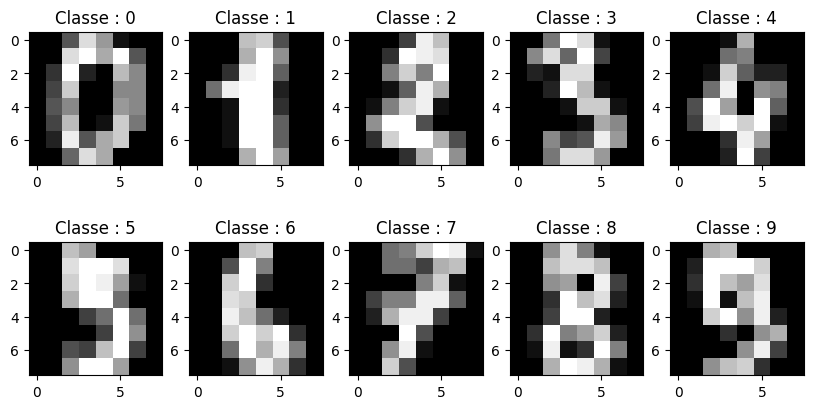

In [22]:

from matplotlib import pyplot as plt 
import seaborn as sns

# Affichez quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Classe : {y[i]}")
plt.show()

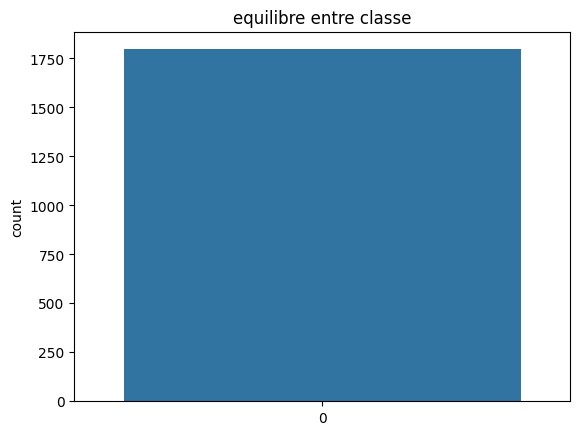

In [24]:
# Analysez la distribution des classes
sns.countplot(y)
plt.title('equilibre entre classe')
plt.show()

Text(0.5, 1.0, '4')

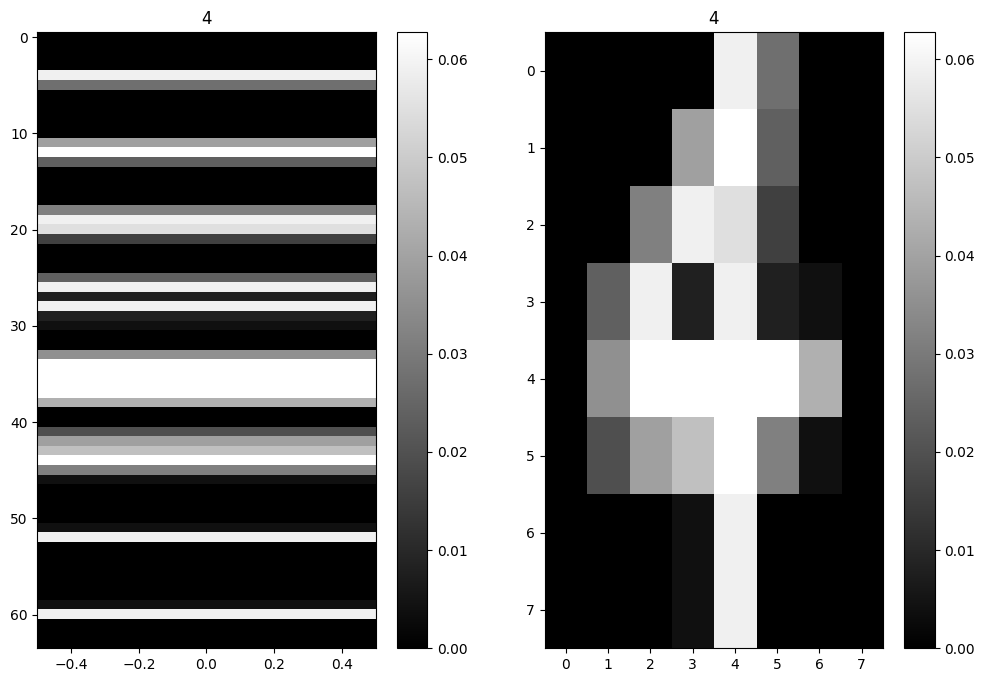

In [7]:
import numpy as np
n = 650

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.reshape( X[n,:],(64,1)) , aspect='auto',cmap='gray')
plt.colorbar()
plt.title(y[n])

plt.subplot(1,2,2)
plt.imshow(np.reshape( X[n,:],(8,8)) , aspect='auto',cmap='gray')
plt.colorbar()
plt.title(y[n])

Text(0.5, 1.0, '4')

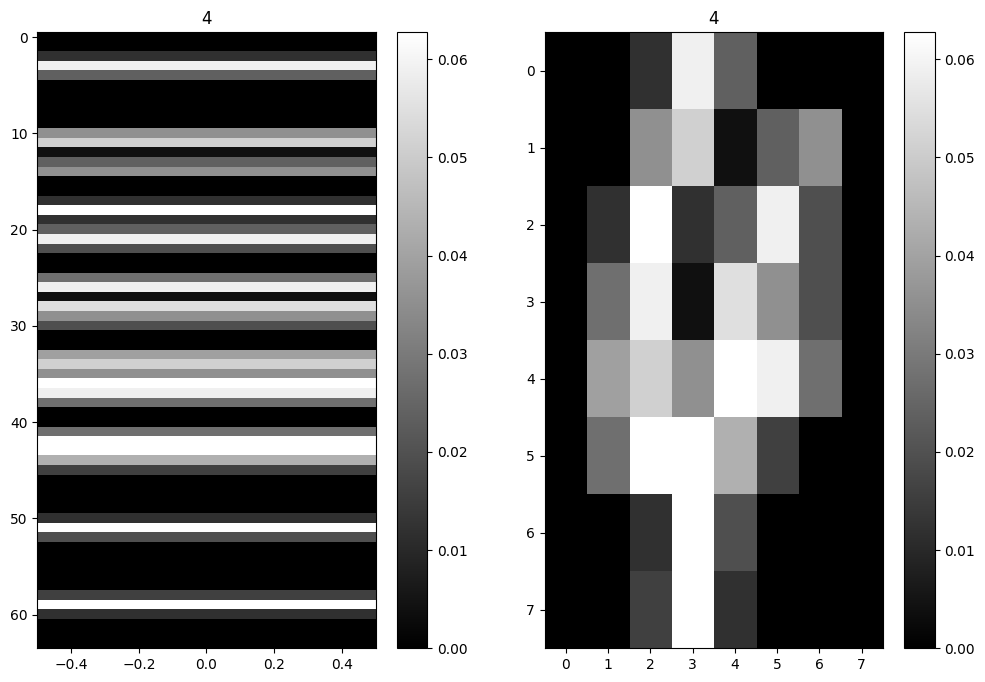

In [8]:
n = 640

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.reshape( X[n,:],(64,1)) , aspect='auto',cmap='gray')
plt.colorbar()
plt.title(y[n])

plt.subplot(1,2,2)
plt.imshow(np.reshape( X[n,:],(8,8)) , aspect='auto',cmap='gray')
plt.colorbar()
plt.title(y[n])

**Classification**

1. Divisez les données en ensembles d'entraînement et de test
2. sélectionnez un modèle de classification
3. ajustez-le
4. évaluez-le et affichez les métriques.

Accuracy: 0.8944444444444445
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.70      0.82      0.75        28
           2       0.91      0.91      0.91        33
           3       0.97      0.97      0.97        34
           4       0.98      0.91      0.94        46
           5       0.95      0.83      0.89        47
           6       0.97      0.97      0.97        35
           7       0.81      1.00      0.89        34
           8       1.00      0.67      0.80        30
           9       0.76      0.85      0.80        40

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.91      0.89      0.89       360



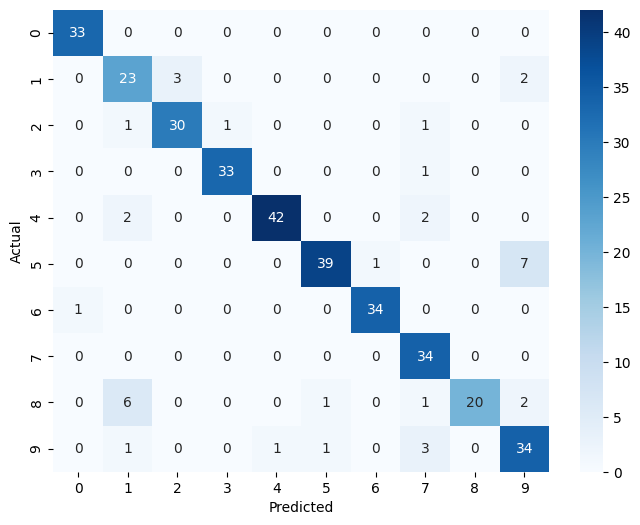

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique
model = LogisticRegression(max_iter=100)

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédisez les étiquettes sur l'ensemble de test
y_pred_logistic = model.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(y_test, y_pred_logistic)
report = classification_report(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Affichez l'exactitude et le rapport de classification
print(f"Accuracy: {accuracy}")
print(report)

# Affichez la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Veille Technologique à faire

* Accuracy
* precision
* recall
* unbalanced accuracy
* f1 score
* confusion matrix 
* 

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Régression Logistique - Accuracy: 0.8944444444444445
Gradient Boosting (fine-tuned) - Accuracy: 0.9694444444444444


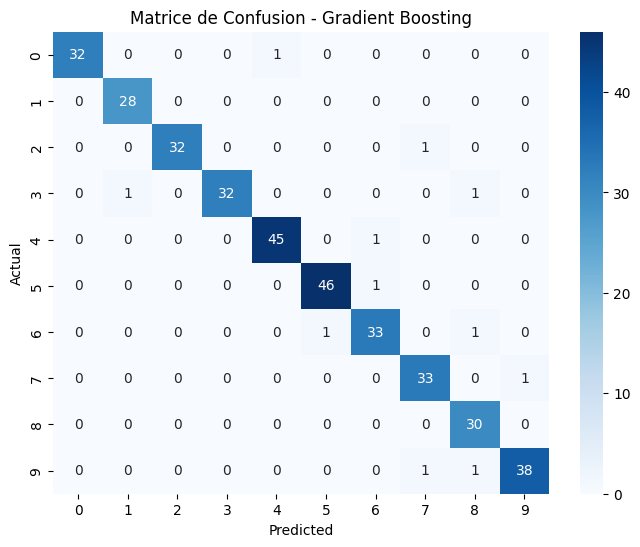

best parameters: 
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Modèle alternatif : Classificateur Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()

# Définissez la grille des hyperparamètres à ajuster
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Utilisez GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(gradient_boosting_model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Entraînez le modèle Gradient Boosting avec les meilleurs hyperparamètres
best_gradient_boosting_model = GradientBoostingClassifier(**best_params)
best_gradient_boosting_model.fit(X_train, y_train)

# Prédisez les étiquettes sur l'ensemble de test avec le modèle Gradient Boosting optimisé
y_pred_gradient_boosting = best_gradient_boosting_model.predict(X_test)

# Évaluez les performances des deux modèles
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)

print("Régression Logistique - Accuracy:", accuracy_logistic)
print("Gradient Boosting (fine-tuned) - Accuracy:", accuracy_gradient_boosting)

# Affichez la matrice de confusion pour le modèle Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gradient_boosting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion - Gradient Boosting')
plt.show()

print("best parameters: ")
print(best_params)


classe estimée [6]
probabilité [[0.09046635 0.09171793 0.07547455 0.05581933 0.10272845 0.07120551
  0.28166438 0.06468423 0.0846778  0.08156149]]


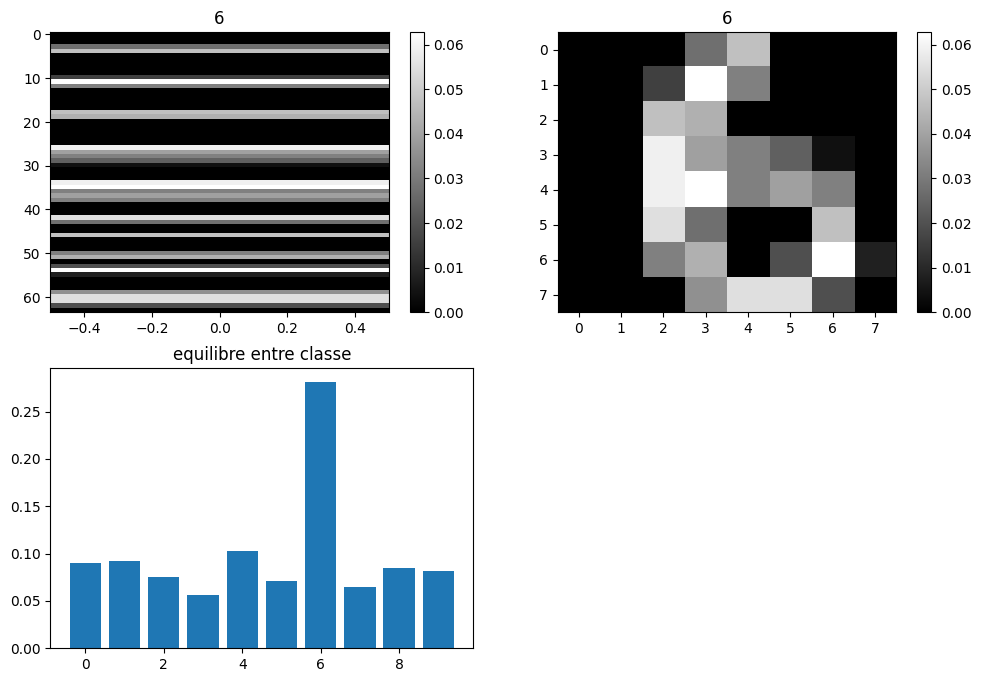

In [11]:
# n = 640 # de X

n = 0

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(np.reshape( X_test[n,:],(64,1)) , aspect='auto',cmap='gray')
plt.colorbar()
plt.title(y_test[n])

plt.subplot(2,2,2)
plt.imshow(np.reshape( X_test[n,:],(8,8)) , aspect='auto',cmap='gray')
plt.colorbar()
plt.title(y_test[n])

proba = model.predict_proba( np.reshape( X_test[n,:],(1,64)) )

print( "classe estimée", model.predict( np.reshape( X_test[n,:],(1,64)) ))
print( "probabilité", proba)

plt.subplot(2,2,3)
plt.bar(np.arange(10),proba[0])
plt.title('equilibre entre classe')
plt.show()